In [37]:
import torch
from utils import *
from core import *

device = 'cuda'

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# using v0.1 produced tensors

indices = torch.load('matrix_200/indices_rot4.pt')
indices[0] = indices[0] - 4*200*200
values = torch.load('matrix_200/values_rot4.pt')

In [40]:
A = torch.sparse_coo_tensor(indices, values, size=[200*200, 200*200*200], dtype=torch.float32)
A.shape

torch.Size([40000, 8000000])

In [41]:
A

tensor(indices=tensor([[      0,       0,       0,  ...,   39999,   39999,
                          39999],
                       [ 282400,  282600,  282601,  ..., 7599406, 7599407,
                        7599408]]),
       values=tensor([0.0882, 0.1595, 0.2477,  ..., 0.2417, 0.2417, 0.0701]),
       size=(40000, 8000000), nnz=9306240, layout=torch.sparse_coo)

In [42]:
projections = torch.load('test_data/projections_scaled.pt')
recons = torch.load('test_data/recon_scaled.pt')
recons.shape, projections.shape

(torch.Size([179, 200, 200]), torch.Size([200, 200, 200]))

In [43]:
recons_filled = torch.zeros(200, 200, 200)
recons_filled.shape

torch.Size([200, 200, 200])

In [44]:
recons_filled[12:191, :, :] = recons

In [45]:
proj = torch.sparse.mm(A.to(torch.float32), recons_filled.flatten().view(-1, 1))
proj.shape

torch.Size([40000, 1])

In [46]:
img = proj.view(200, 200)

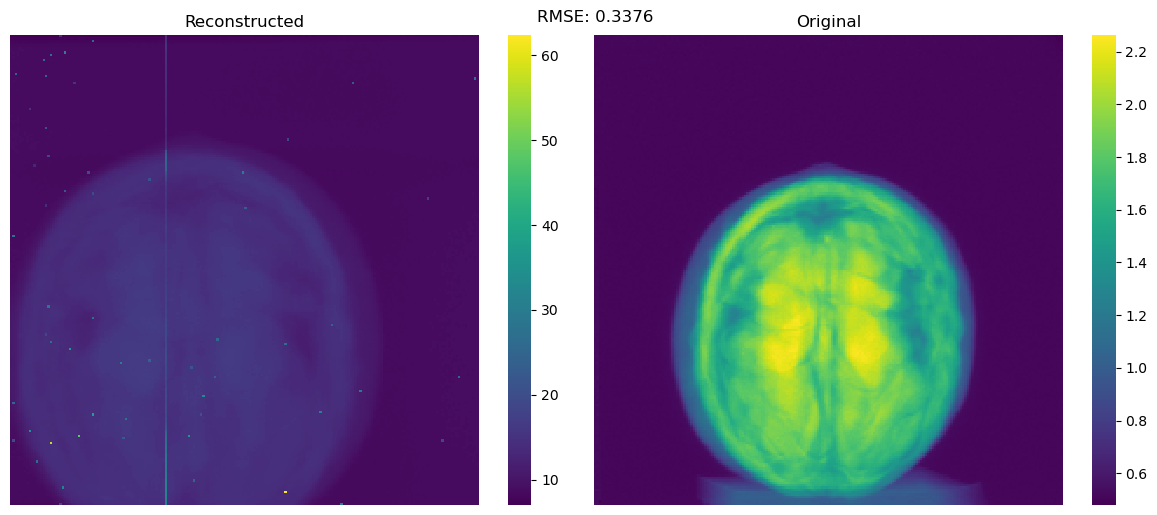

In [47]:
plot_2d_images(img.cpu(), projections[:, :, 5].cpu())